In [1]:
#import library we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read our dataset
train = pd.read_csv('Data-Train.csv')
test = pd.read_csv('Data-Test.csv')

In [3]:
#change our dataset to matrix and transpose them
x_train = np.transpose(np.asmatrix(train['x']))
y_train = np.transpose(np.asmatrix(train['y']))

x_test = np.transpose(np.asmatrix(test['x']))
y_test = np.transpose(np.asmatrix(test['y']))

In [4]:
#add x0 to our data
ones = np.ones((x_train.shape[0],1))
x_new = np.append(ones, x_train, 1)

In [5]:
#creat our m , n  and theta fill with 1 (2*1)
m, n = np.shape(x_new)
theta = np.ones((1,n))
theta = np.transpose(theta)
theta_new = theta

In [6]:
#choose our iteration & Learning Rate

itr= 200
alpha = 0.00004

#calculate our Gradient Descent (Stochastic)
LSM = np.zeros((itr,2))
d = 0

while d < itr:
    for i in range(0, m):
        for j in range(0, n):
            theta_new[j] = theta[j] - (alpha * ((x_new[i]*theta - y_train[i])*x_new[i, j]))
        
        theta = theta_new
    
    y_pred = theta[0] + theta[1]*x_train.T
    
    Loop_LSM = 0
    for i in range(0, m):       
        Loop_LSM += (y_train.A1[i] - y_pred.A1[i])**2        
    Loop_LSM = Loop_LSM/(2*m)
    LSM[d,0] = d
    LSM[d,1] = Loop_LSM
    
    d += 1
    
print('Number of iteration : ',itr)
print('Learning Rate : ',alpha)
print('Theta[0] = ', theta[0])
print('Theta[1] = ', theta[1])

Number of iteration :  200
Learning Rate :  4e-05
Theta[0] =  [-0.07264958]
Theta[1] =  [1.00600317]


In [7]:
#calculate our h(theta) or y_predection for both data
y_pred_train = theta[0] + theta[1]*x_train.T

y_pred_test = theta[0] + theta[1]*x_test.T

In [8]:
#calculate our test data cost function
train_LSM = 0
m = y_train.shape[0]

for i in range(m):
    train_LSM += ((y_train.A1[i] - y_pred_train.A1[i])**2)
train_LSM = train_LSM/(2*m)

print("Train Least Squared Error : ", train_LSM)

Train Least Squared Error :  4.1856898741848125


In [9]:
#calculate our test data cost function
test_LSM = 0
m = y_test.shape[0]

for i in range(m):
    test_LSM += ((y_test.A1[i] - y_pred_test.A1[i])**2)
test_LSM = test_LSM/(2*m)

print("Test Least Squared Error : ", test_LSM)

Test Least Squared Error :  4.610875131374377


No handles with labels found to put in legend.


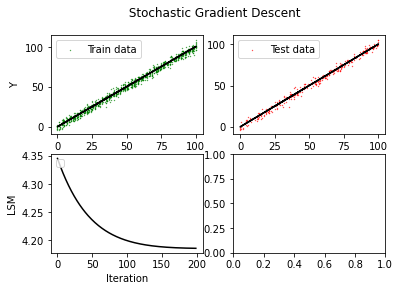

In [10]:
#plot our data and Gradient
fig, plots = plt.subplots(2,2)
fig.suptitle(' Stochastic Gradient Descent')

plots[0,0].scatter(train['x'],train['y'],color = "green", s = 0.1, label = 'Train data')
plots[0,0].plot(x_train.T.A1, y_pred_train.A1, color = "black") 
plots[0,0].set(xlabel='X', ylabel='Y')
plots[0,0].legend(loc = 'upper left')

plots[0,1].scatter(test['x'],test['y'],color = "red", s = 0.1, label = 'Test data')
plots[0,1].plot(x_train.T.A1, y_pred_train.A1, color = "black") 
plots[0,1].set(xlabel='X')
plots[0,1].legend(loc = 'upper left')

plots[1,0].plot(LSM.T[0], LSM.T[1], color = "black") 
plots[1,0].set(xlabel='Iteration', ylabel='LSM')
plots[1,0].legend(loc = 'upper left')

plt.show() 